<a href="https://colab.research.google.com/github/AlexMa123/BIU-Computational-Physics-2024/blob/main/Lecture2%20-%20fractal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fractal

## Review

### Why do we need fractals?
Euclidian geometry cannot describe complex structures in nature, since it deals only with simple shapes and forms such as straight lines, triangles, circles and so on. However, nature doesn't have such simple structures.

|![example of fractals](https://www.researchgate.net/publication/340926663/figure/fig1/AS:941847388110856@1601565324876/Examples-of-fractal-a-Examples-of-mathematical-fractals-Bovill-1996-b-Examples-of.png)|
|:-:|
|*Fig1.1: a) Examples of mathematical (deterministic) fractals: Koch curve, Sierpinski triangle, dragon curve; b) Fractal in nature*|

### What is a fractal ?
A fractal is an object or quantity that displays `self-similarity`, in a somewhat technical sense, on all scales. The object needs not to exhibit exactly the same structure at all scales, but `the same "type" of structures must appear on all scales`. A plot of the quantity on a log-log graph versus scale then yields a straight line, whose slope is said to be the fractal dimension. The prototypical example for a fractal is the length of a coastline measured with rulers of different lengths.

### Self-similarity and scale invariance

The most important property of fractals is their [self-similarity](https://en.wikipedia.org/wiki/Self-similarity). Self-similarity means the object looks "roughly" the same on any scale. Note the main difference between regular Euclidean space and fractal geometry: whereas regular space is symmetric under translation, in fractals this symmetry is violated. Instead, fractals possess a new symmetry, called scale invarience.

|![Self-similarity](https://i.imgur.com/YHRsUQC.gif)|
|:--:|
|*Fig 1.3.1 Self-similarity in the Mandelbrot set shown by zooming in on the Feigenbaum point*|

|![scale-invariance](https://upload.wikimedia.org/wikipedia/commons/2/2a/Wiener_process_animated.gif)|
|:--:|
|*Fig 1.3.2 The Wiener process (a stochastic process) is scale-invariant.*|

|![costline](https://media1.giphy.com/media/443pAv9m6Ti8KiCoAi/200w.gif?cid=6c09b952jpqt9g879d3qks7e0ld69x0w6nxag1amj0glzeep&ep=v1_gifs_search&rid=200w.gif&ct=g)|
|:--:|
|*Fig 1.3.3 Coastline.*|


### Types of Fractals
* Determinisitic
     - also: "ideal fractals"
     - every small part of the picture when magnified properly looks as the whole picture.
     - Examples: Koch curve, dragon fractal, Sierpinski gasket, Mandelbrot set ...
* random
     - Examples: infinite cluster generated by percolation near the critical threshold, scale-free network, Brownian motion (or Wiener process)

### Generate Koch curve by python

> numba is a package used to translate Python functions to optimized machine code at runtime.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit


In [ ]:
from numba import njit, prange

def mysum(n=10000):
  result = 0
  for i in range(n):
    result = result + i
  return result

@njit
def mysum_njit(n=10000):
    result = 0
    for i in range(n):
        result = result + i
    return result

mysum_njit()

49995000

In [ ]:
%timeit mysum()

551 µs ± 30.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit mysum_njit()

226 ns ± 6.23 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


![koch curve](https://www.researchgate.net/profile/Marcelo-Ribeiro-37/publication/26365833/figure/fig5/AS:310046622797835@1450932283682/Construction-of-the-von-Koch-curve-F-At-each-stage-the-middle-third-of-each-interval.png)

In [ ]:
@njit
def add_trangle(x1, y1, x2, y2):
    length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2) / 3 # length for each small elements
    angle = np.arctan2(y2 - y1, x2 - x1) # angle of the original line
    x_new = np.zeros(5)
    y_new = np.zeros(5)
    x_new[0], x_new[4] = x1, x2
    y_new[0], y_new[4] = y1, y2

    x_new[1] = (x2 - x1) / 3 + x1
    y_new[1] = (y2 - y1) / 3 + y1

    x_new[2] = x_new[1] + np.cos(angle + np.pi / 3) * length
    y_new[2] = y_new[1] + np.sin(angle + np.pi / 3) * length

    x_new[3] = x2 - (x2 - x1) / 3
    y_new[3] = y2 - (y2 - y1) / 3

    return x_new, y_new

@njit
def iterate_koch(x, y):
    """
    Input:
        x: array
        y: array
    Return:
        x_new: array
        y_new: array
    """
    x_new = np.zeros((x.size - 1) * 3 + x.size)
    y_new = np.zeros((y.size - 1) * 3 + y.size)
    for j in range(x.size - 1):
        # insert three points between every two points
        x_new[j * 4: j * 4 + 5], y_new[j * 4: j * 4 + 5] \
                = add_trangle(x[j], y[j], x[j+1], y[j+1])
    return x_new, y_new

@njit
def koch_curve(n, x=np.array([0., 1.]), y=np.array([0., 0.])):
    for i in range(n):
        x, y = iterate_koch(x, y)

    return x, y

In [ ]:
kochcurve = koch_curve(8)

In [ ]:
kochcurve[1]

array([0.      , 0.      , 0.000132, ..., 0.000132, 0.      , 0.      ])

(0.0, 1.0, -0.01, 0.3)

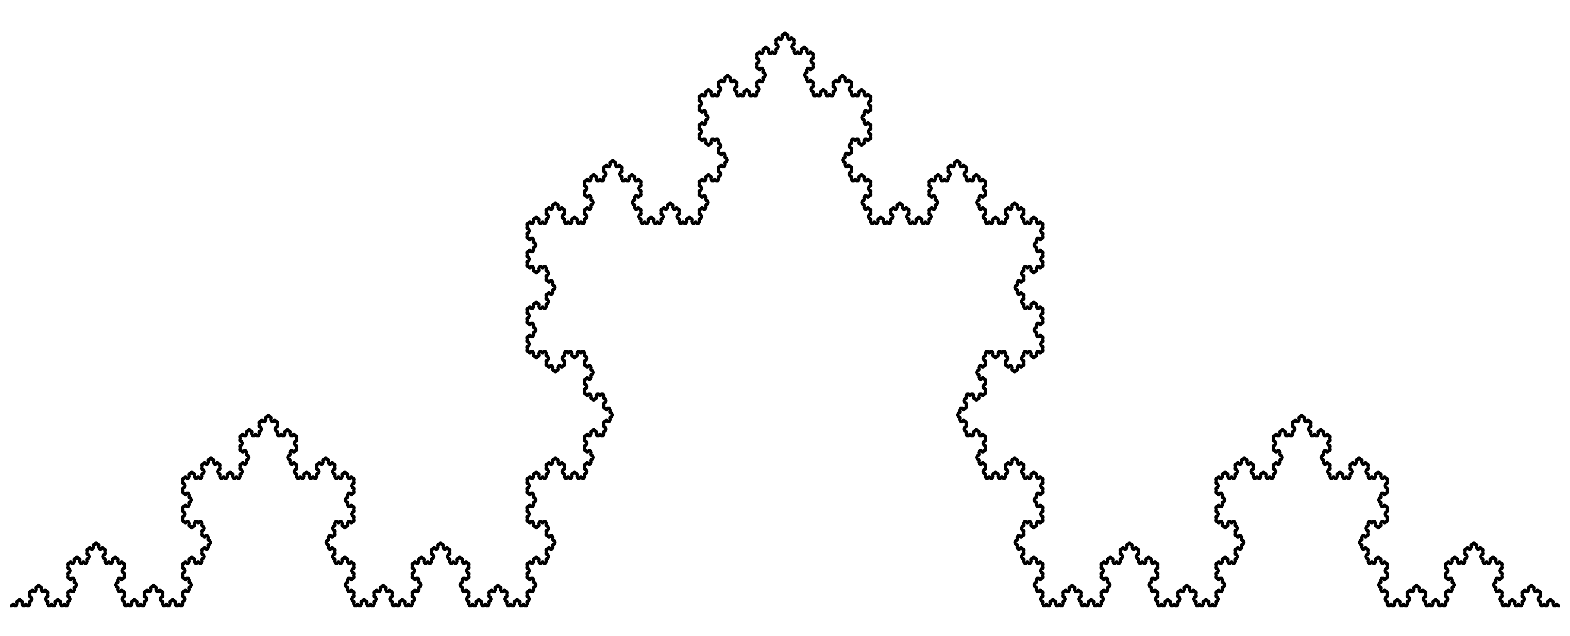

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(kochcurve[0], kochcurve[1], 'k')
plt.xlim(0, 1)
plt.ylim(-0.01, 0.3)
plt.axis('off')

### Estimate fractal dimension by the Box counting method

Box counting is similar to finding the relationship between resolution and image size.

For simpliy 1d

|![Self-similarity](https://miro.medium.com/v2/resize:fit:640/format:webp/1*UyDftj1kgVkr-rNud54_1g.png)|
|:--:|
|*Fig 1.6.1 Image size and resolution*|


In [ ]:
import numpy as np

def fig_to_array(fig):
    """
    convert matplotlib figure object to numpy array.
    Input:
        fig: matplotlib figure object
    Return:
        numpy array, (height, width, rgba). rgba: red, green blue, alpha(Transparency)。
        (255, 255, 255) is white
    """
    import io
    io_buf = io.BytesIO()
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    fig.savefig(io_buf, format='raw')
    io_buf.seek(0)
    data = np.frombuffer(io_buf.getvalue(), dtype=np.uint8)
    data = data.reshape((int(fig.bbox.bounds[3]), int(fig.bbox.bounds[2]), -1))
    io_buf.close()
    return data[:, :, :3]



from fractal_tools import rescale, boxcount

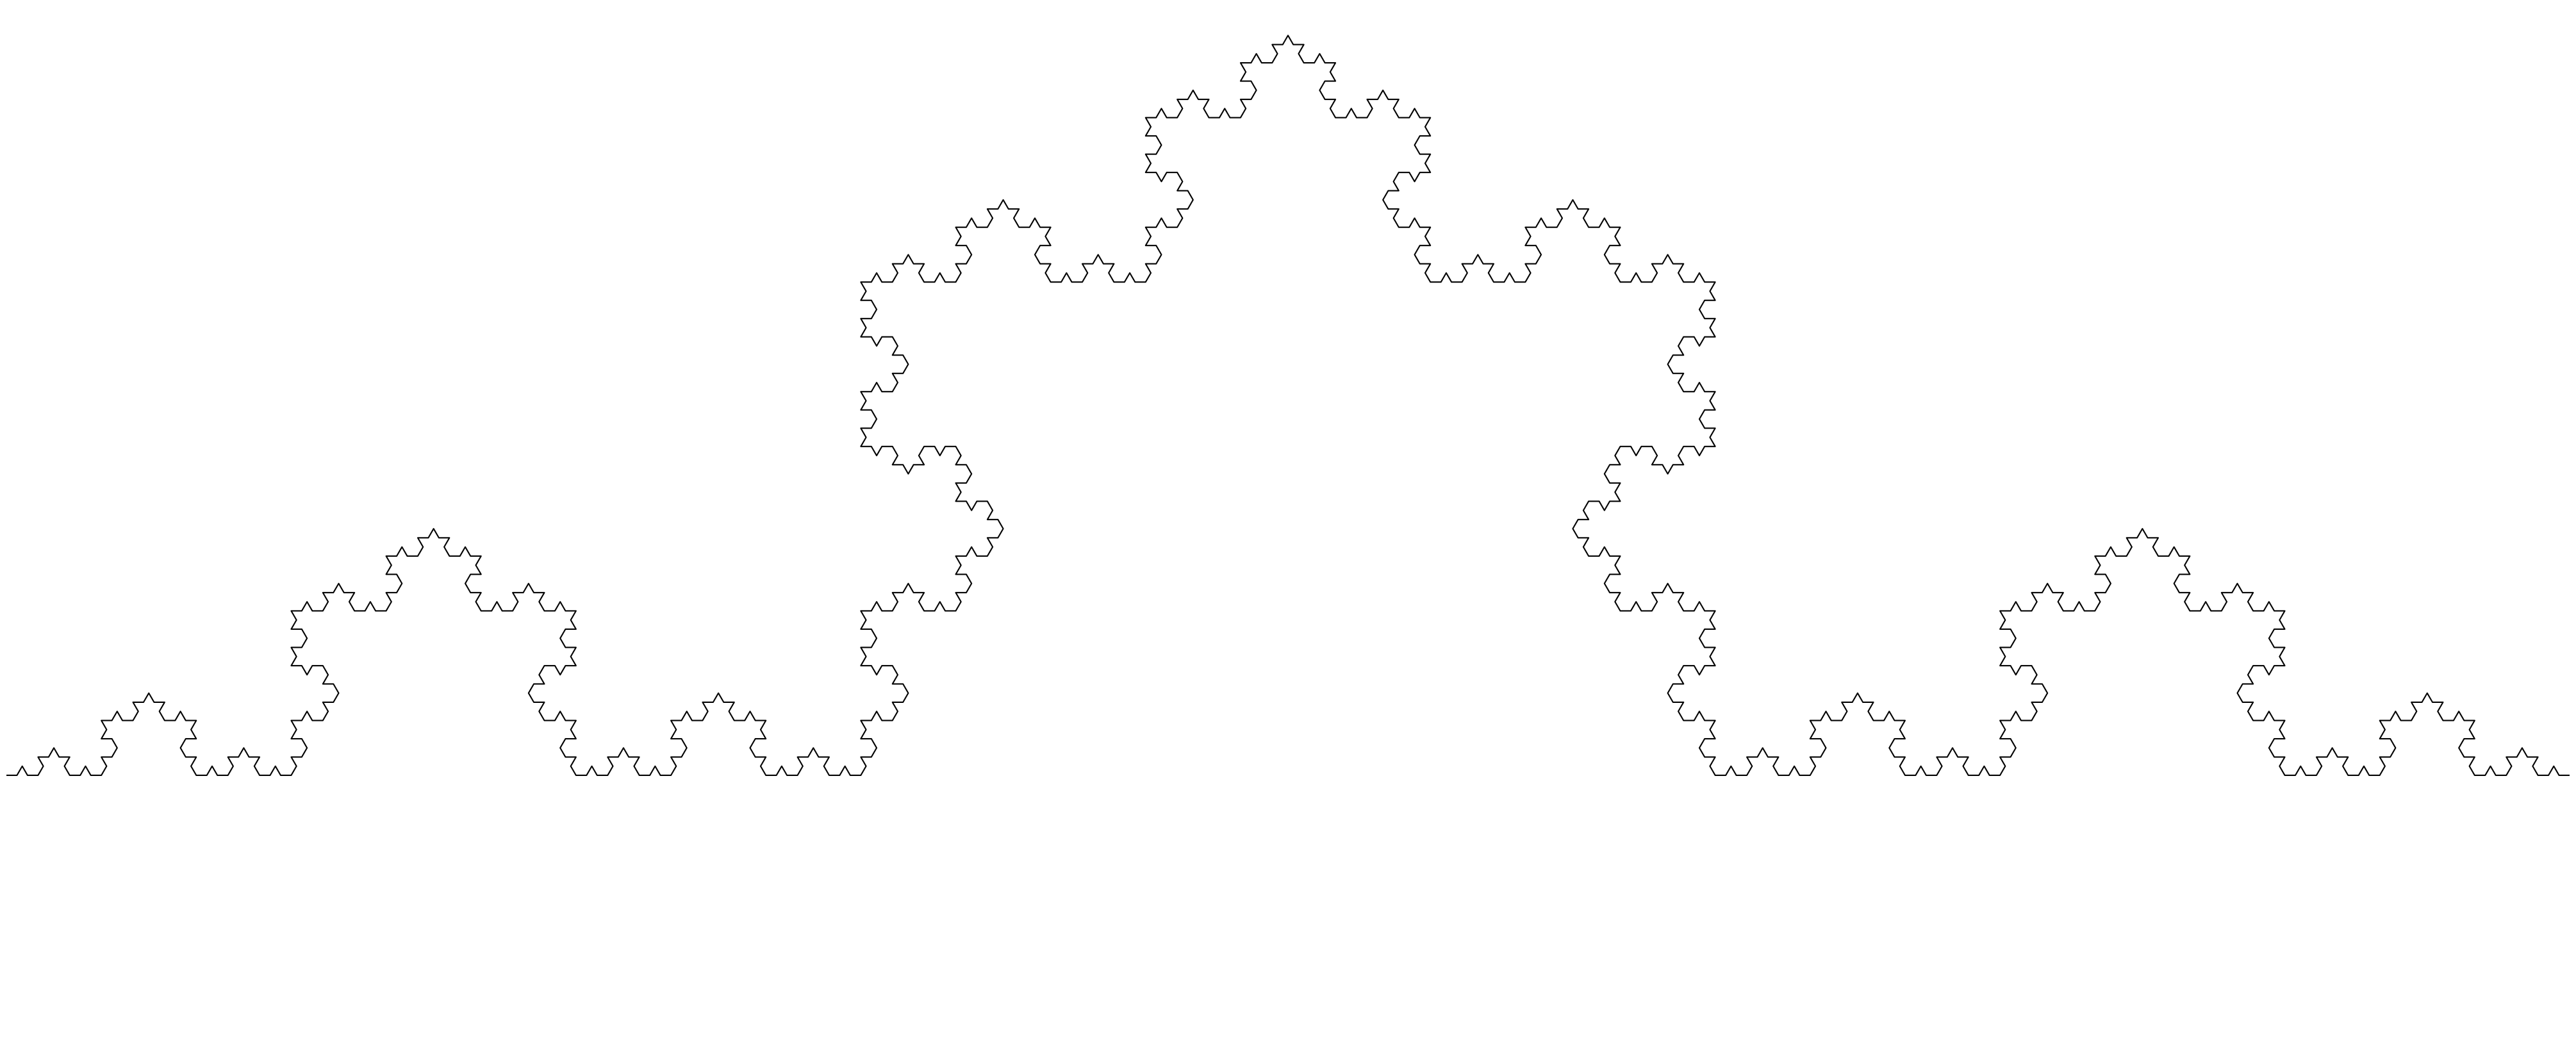

In [ ]:
kochcurve = koch_curve(5)

fig = plt.figure(figsize=(40, 16))
plt.plot(kochcurve[0], kochcurve[1], 'k')
plt.xlim(0, 1)
plt.ylim(-0.1, 0.3)
plt.axis('off')

img_matrix = fig_to_array(fig)

In [ ]:
((255 - np.mean(img_matrix, axis=-1)) / 255).sum()

34900.59215686273

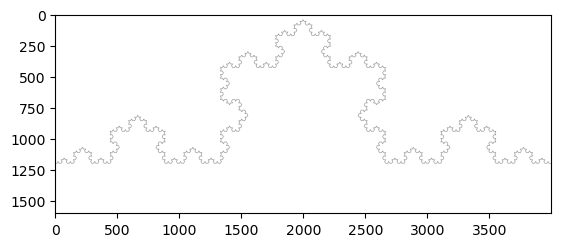

In [ ]:
plt.imshow(img_matrix)

(-0.5, 148.5, 59.5, -0.5)

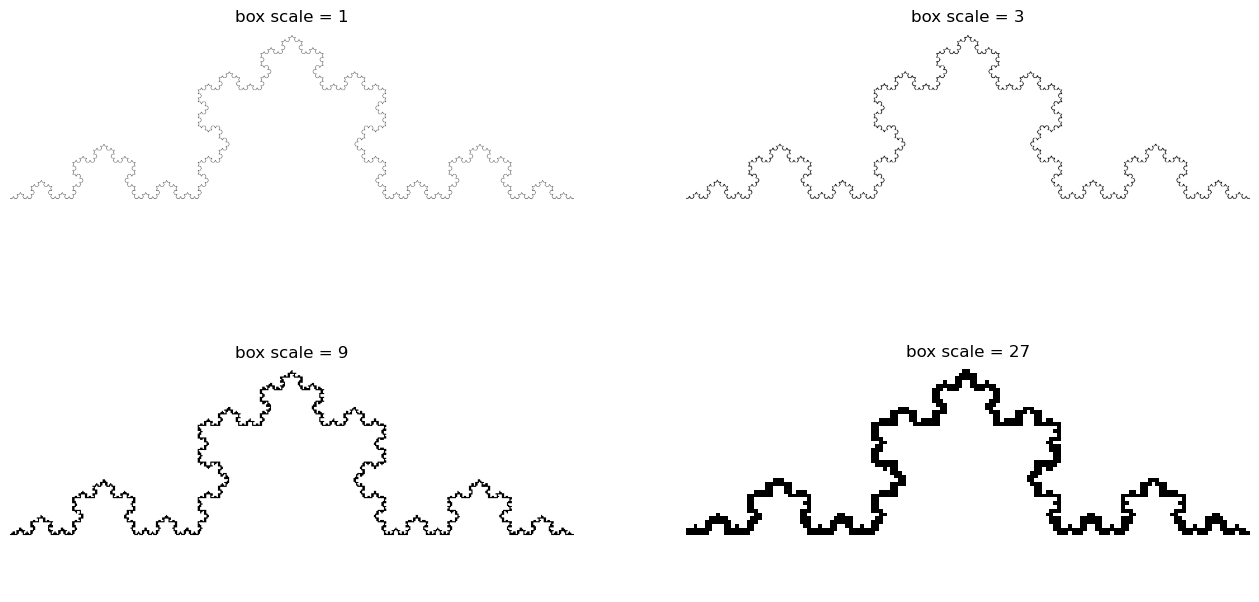

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(221)
plt.imshow(rescale(img_matrix, 1), cmap='Greys')
plt.title("box scale = 1")
plt.axis('off')

plt.subplot(222)
plt.imshow(rescale(img_matrix, 3), cmap='Greys')
plt.title("box scale = 3")
plt.axis('off')

plt.subplot(223)
plt.title("box scale = 9")
plt.imshow(rescale(img_matrix, 9), cmap='Greys')
plt.axis('off')

plt.subplot(224)
plt.title("box scale = 27")
plt.imshow(rescale(img_matrix, 27), cmap='Greys')
plt.axis('off')

In [ ]:
scale = np.arange(3, 17, 1, dtype=int)
mass = np.zeros_like(scale)
for i, s in enumerate(scale):
    mass[i] = boxcount(img_matrix, s)

p = np.polyfit(np.log(scale), np.log(mass), 1)

Text(0.5, 1.0, 'fractal dimension is 1.248')

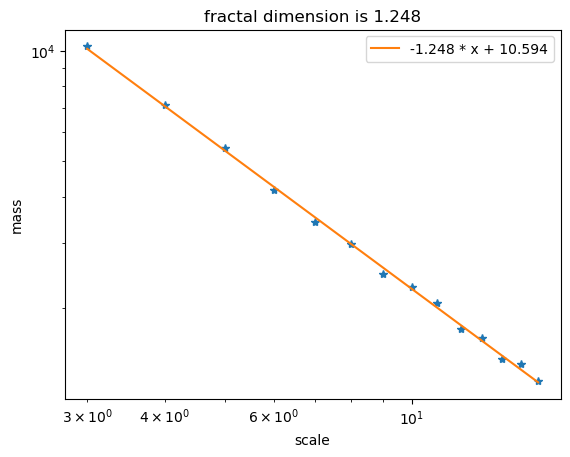

In [ ]:
plt.plot(scale, mass, '*')
plt.plot(scale, (np.exp(p[0] * np.log(scale) + p[1])), label=f'{p[0]:.3f} * x + {p[1]:.3f}')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('scale')
plt.ylabel('mass')
plt.title(f"fractal dimension is {-p[0]:.3f}")

In [ ]:
np.log(4) / np.log(3)

1.2618595071429148

### One example of fractals in Chaos - The Logistic Map

A very nice video https://www.youtube.com/watch?v=ovJcsL7vyrk

The logistic map is described by the equation:
   $$x_{n+1} = r x_n (1-x_n)$$
  
and $x_n$ is between zero and one, $r$ is the growth factor (growth rate)

In [ ]:
from numba import njit
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual

@njit
def logistic_map(r=3, x0=0.5, nstep=50):
    x = np.zeros(nstep)
    x[0] = x0
    for i in range(nstep-1):
        x[i + 1] = r * x[i] * (1 - x[i])
    return x

def plot_logistic(r, x0):
    plt.figure(figsize=(20, 5))
    plt.plot(logistic_map(r, x0, 100), 'o-')
    plt.ylim(0, 1)
    # plt.plot(logistic_map(r, x0 + 1e-4, 100), 'o-')

In [ ]:
interactive(plot_logistic, r=widgets.FloatSlider(
    value=3.3, min=0.5, max=3.99, step=0.01
), x0=widgets.FloatSlider(
    value=0.501, min=0.01, max=1, step=0.01
))

interactive(children=(FloatSlider(value=3.3, description='r', max=3.99, min=0.5, step=0.01), FloatSlider(value…

#### visualize bifuecation

In [ ]:
def bifurcation(r_array, x0=0.5, nstart=10000, nmax=10256):
    """
    calculate stable values for different r
    Input:
        r_array: array, r values
        x0: float
        nstart: int, wait nstart steps before recording
        nmax: int, number of step to iterate.
    Return:
        List of array, length of the list will be the same with the length of r_array
    """
    b = []
    for r in r_array:
        x = logistic_map(r, x0, nmax)
        x = np.round(x[nstart:], 8) # round an array to the given number of decimals.
        b.append(np.unique(x)) # Returns the sorted unique elements of an array.
    return b

In [ ]:
np.unique([0,0,0,2,2,2])

array([0, 2])

In [ ]:
r_array = np.arange(0.5, 3.99, 0.001)
b = bifurcation(r_array)

In [ ]:
points = []
for i, r in enumerate(r_array):
    for be in b[i]:
        points.append((r, be))
points = np.array(points)
points.shape

(101623, 2)

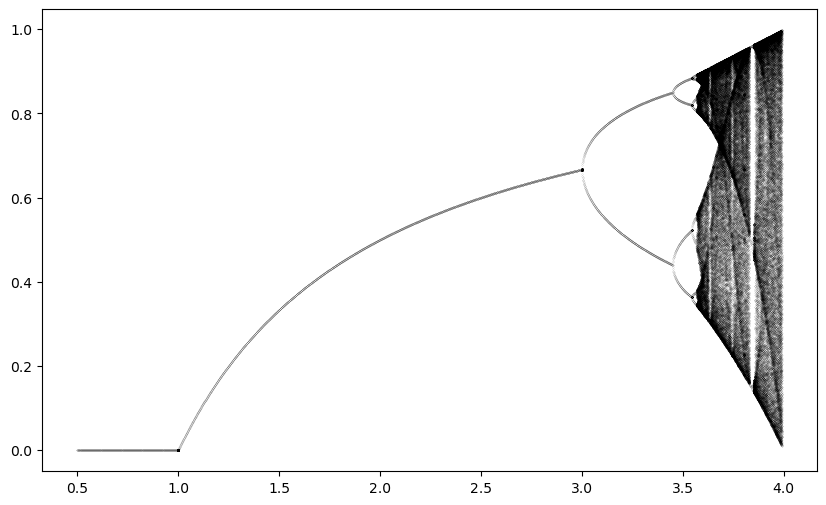

In [ ]:
# %matplotlib inline
fig1 = plt.figure(figsize=(10,  6))

plt.plot(points[:, 0], points[:, 1], 'k.', markersize=0.1)
# plt.xlim(3.8, 3.9)

From the bifurcation diagram,  we can find period-doubling bifurcation

![logistic map zoom in](https://juliadynamics.github.io/JuliaDynamics/videos/interact/interactive_chaos_logo.gif)


### Mandelbort set

If we let $z = r (\frac{1}{2} - x)$, $c = \frac{r}{2} (1 - \frac{r}{2})$, the logistic map will be transformed to:
$$z_{n+1} = z_n ^ 2 + c$$

Now let's consider z is a complex number. The Mandelbrot set is the set of complex numbers c for which $z_n$ doesn't diverge to infinity when $z_0 = 0$

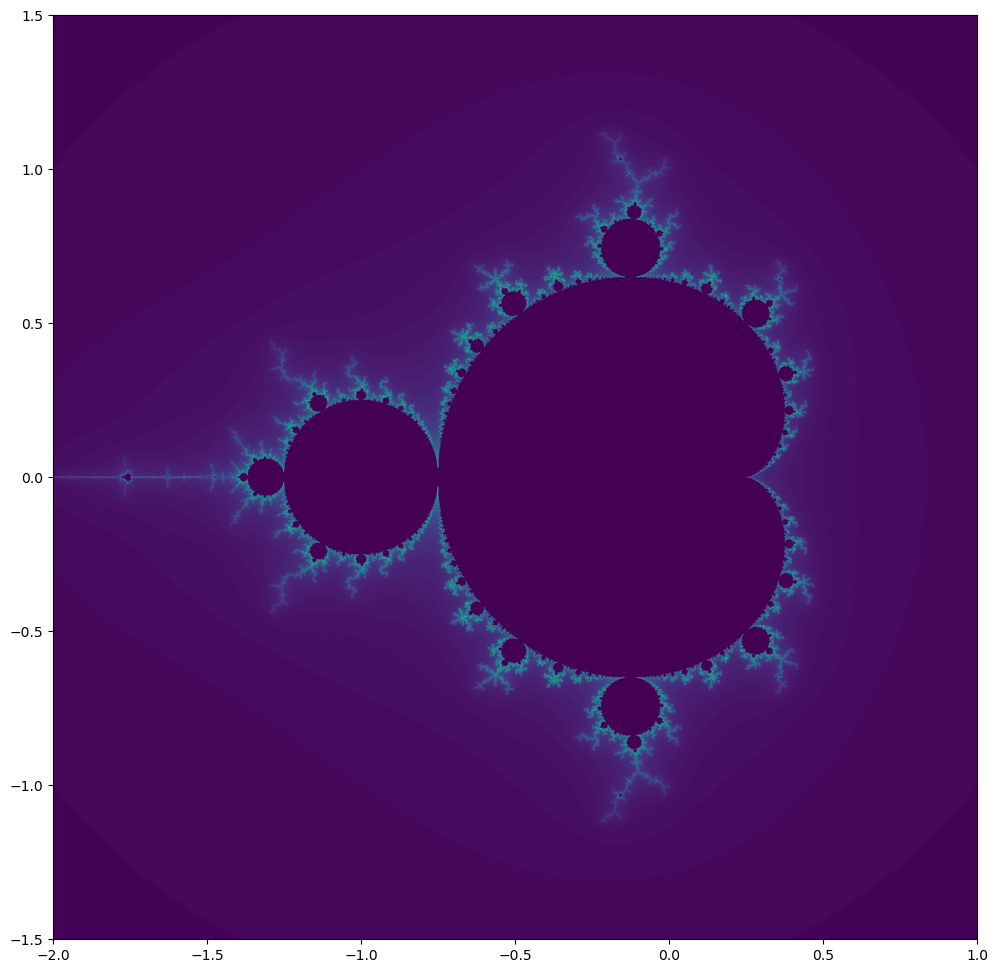

In [ ]:
@njit
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    Input:
        x: float
        y: float
        max_iters: int
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z * z + c
        if (z.real * z.real + z.imag * z.imag) >= 10:
            return i

    return 0

@njit
def create_fractal(x, y, iters):
    """
    Input:
        x: 2d array
        y: 2d array
        iters: int
    """
    color = np.zeros_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            real = x[i, j]
            imag = y[i, j]
            color[i, j] = mandel(real, imag, iters)

    return color

x = np.arange(-2, 1, 0.001) ## real part
y = np.arange(-1.5, 1.5, 0.001) ## imag part
x, y = np.meshgrid(x, y)


image = create_fractal(x, y, 100)

plt.figure(figsize=(12, 12))
plt.imshow(image, extent=[-2, 1, -1.5, 1.5])
plt.show()

Figure from wikipedia, logistic map with mandelbort set

![Mandelbort set with logistic](https://www.researchgate.net/profile/Tssachin-Venkatesh/publication/343986739/figure/fig1/AS:930432354897922@1598843768697/The-real-line-on-the-mandelbrot-set-lines-up-with-the-bifurcations-in-the-logistic-map-1.jpg)


# Exercises

## 1. Work with chatgpt on an application of fractals in a given field of your choice. Summarize in your own words (3 to 4 sentences) what you have learned from chatgpt and evaluate whether it is correct or not.

## 2. United Kingdom's fractal dimension.

### 1) Implement the box-counting function.
> Hint: https://github.com/rougier/numpy-100 (#87) could help you

Here is the question with the solution:

>87. Consider a 16x16 array, how to get the block-sum (block size is 4x4)? (★★★)

```python
# Author: Sebastian Wallkötter (@FirefoxMetzger)
Z = np.ones((16,16))
k = 4

windows = np.lib.stride_tricks.sliding_window_view(Z, (k, k))
S = windows[::k, ::k, ...].sum(axis=(-2, -1))
```

In [ ]:
import numpy as np

def myrescale(img_matrix, k):
    """
    rescale a image

    The img_matrix will be a matrix whose shape is (N, M) only contains 0 and 1.
    the return value of this function will also be a matrix contains 0 and 1, but the shape will be
    (N // k, M // k)
    """
    # Hint: https://github.com/rougier/numpy-100 (#87)
    # Write your code Here
    raise NotImplementedError # remove this line after you finish your code


def myboxcount(img_matrix, k):
    """
    rescale img_matrix by k and count how many occupied sites.
    Input:
        img_matrix: 3d array (height, width, rgb)
        k: int

    Return:
        int
    """
    # Write your code Here
    raise NotImplementedError # remove this line after you finish your code



### 2) After implementing the functions, run the following code to test your function.

In [ ]:
# Do not need to modify the codes here, only used to your code
import requests
import io
import matplotlib.pyplot as plt

# Load the UK's coastline
response = requests.get('https://github.com/AlexMa123/BIU-Computational-Physics-2024/raw/main/data2share/UK_map.npy')
response.raise_for_status()
img_matrix = np.load(io.BytesIO(response.content), allow_pickle=True)

# Test the rescale function
plt.figure(figsize=(8, 10))
plt.subplot(221)
plt.imshow(myrescale(img_matrix, 8), cmap='Greys')
plt.title("box scale = 8")
plt.axis('off')

plt.subplot(222)
plt.imshow(myrescale(img_matrix, 16), cmap='Greys')
plt.title("box scale = 16")
plt.axis('off')

plt.subplot(223)
plt.title("box scale = 32")
plt.imshow(myrescale(img_matrix, 32), cmap='Greys')
plt.axis('off')

plt.subplot(224)
plt.title("box scale = 64")
plt.imshow(myrescale(img_matrix, 64), cmap='Greys')
plt.axis('off')

### 3) Use linear regression to determine the fractal dimension of the UK's coastline.

In [ ]:
# Do not need to modify the codes here, only for testing your code

scale = np.logspace(0.5, 2, 20, dtype=int)
mass = np.zeros_like(scale)
for i, s in enumerate(scale):
    mass[i] = myboxcount(img_matrix, s)

p = np.polyfit(np.log(scale), np.log(mass), 1)

In [ ]:
# Do not need to modify the codes here, only for testing your code

plt.plot(scale, mass, '*')
plt.plot(scale, (np.exp(p[0] * np.log(scale) + p[1])), label=f'{p[0]:.3f} * x + {p[1]:.3f}')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('scale')
plt.ylabel('mass')
plt.title(f"fractal dimension is {-p[0]:.3f}")

If you have used the hint I provided to you, please

1) Search the function `sliding_window_view` from numpy's website and explain its usage?

2) The function is saved in the module 'stride_tricks'. What does stride mean in a numpy array?

In [ ]:
import numpy as np
from sys import getsizeof
x1 = np.arange(7)
x1 = np.lib.stride_tricks.sliding_window_view(x1, 4)

x2 = np.array([
    [0, 1, 2, 3],
    [1, 2, 3, 4],
    [2, 3, 4, 5],
    [3, 4, 5, 6]
])

print('Is x1 have the same element with x2 ?', np.allclose(x1, x2))
print(f"array x1 takes {getsizeof(x1)} bytes, array x2 takes {getsizeof(x2)} bytes")

Is x1 have the same element with x2 ? True
array x1 takes 128 bytes, array x2 takes 192 bytes


3) As you can see, x1 and x2 appear identical, but why does x2 occupy more memory than x1? (You can answer the question after you have a correct understanding of the concept 'stride')

### 4) Compare your result with the fractal dimension you have learned from the course. Are they close? If not, what could be the reason for the difference?

## 3. Chaos game
In mathematics, the term chaos game originally referred to a method of creating a fractal, using a polygon and an initial point selected at random inside it.



### Task1

Step 1: choose three points: A(0, 0), B(1, 0), C (1, 1)

Step 2: randomly choose a points P0

Step 3: randomly select one point from (A, B, C), move the point from P0 to P1, where P1 is the middle point between P0 and the selected points. (np.random.randint(n) to generate a random integer from 0 to n (n is not included))


Step 4: repeat Step 2 and Step 3 to get P2 based on P1 and (A, B, C)

...
repeat it 100000 times and plot the points on the figure

to make the plot, use

```python
plt.scatter(x, y, s=0.1, c='black')
plt.axis('off')
```

Both x and y should be arrays with a length of 100000, saving the coordinates of the points.

### Task2

The game that generate Barnsley's fern is to choose four affine transformations randomly.

The four transformations are:


$$f_{1}(x,y)={\begin{bmatrix}\ 0.00&\ 0.00\ \\0.00&\ 0.16\end{bmatrix}}{\begin{bmatrix}\ x\\y\end{bmatrix}}$$

$$ f_{2}(x,y)={\begin{bmatrix}\ 0.85&\ 0.04\ \\-0.04&\ 0.85\end{bmatrix}}{\begin{bmatrix}\ x\\y\end{bmatrix}}+{\begin{bmatrix}\ 0.00\\1.60\end{bmatrix}}$$


$$ f_{3}(x,y)={\begin{bmatrix}\ 0.20&\ -0.26\ \\0.23&\ 0.22\end{bmatrix}}{\begin{bmatrix}\ x\\y\end{bmatrix}}+{\begin{bmatrix}\ 0.00\\1.60\end{bmatrix}}$$


$$ f_{4}(x,y)={\begin{bmatrix}\ -0.15&\ 0.28\ \\0.26&\ 0.24\end{bmatrix}}{\begin{bmatrix}\ x\\y\end{bmatrix}}+{\begin{bmatrix}\ 0.00\\0.44\end{bmatrix}}$$


Step1: set P0 = (0, 0)

Step2: choose an affine transformation f from the four transformations, The probability to choose that four transformation are: [1%, 84%, 7%, 8%] (hint: you can use the function `np.random.choice` )
> np.random.choice([x1, x2, x3, x4], p=[p1, p2, p3, p4]) randomly selects one element from the elements x1, x2, x3, and x4 based on their respective probabilities p1, p2, p3 and p4. (where p1 + p2 +p3 +p4 = 1)

Step3: P1 = f(P0)

repeat 100000 times

to make the plot, use:

```
fig, ax = plt.subplots(figsize=(6, 8))
ax.scatter(x, y, s=0.1, c='green')

ax.set_aspect('equal')
ax.set_xlim(-3, 3)
ax.set_ylim(0, 10)

plt.axis('off')
```

> Hint: In Python, the way to calculate matrix multiplication is as follows.

In [ ]:
# define the matrix
import numpy as np
A = np.array(
    [[0., 0.], [0., 0.16]]
) # shape: (2, 2)
# define the vector
b = np.array([[1], [2]]) # shape (2, 1)

out = A @ b
print(out)
# The symbol "@" represents matrix multiplication,
# while "*" represents element-wise multiplication,
# which is equivalent to ".*" in MATLAB.

[[0.  ]
 [0.32]]


## 4. Calculate the Feigenbaum constant numerically using the Logistic Map.

![Dragon fractal](https://upload.wikimedia.org/wikipedia/commons/3/3e/Feigenbaum.png)

The Feigenbaum constant is defined as:
$$\delta = \lim_{i→∞ } \frac{L_{i}}{L_{i+1}}$$

Try to find the first two ratio (i=0, 1, 2), it should approch to Feigenbaum constant.